<a href="https://colab.research.google.com/github/mcnica89/MATH4060/blob/main/Week1A_w_class_modifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import itertools
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import random as jrandom
from jax import nn as jnn
import random
import time
import math

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
font = {'size'   : 20}

plt.rc('font', **font)

# Simple Random Walks

Generates and plots samples of the $\mathbb{Z}-$valued Markov chain

$$X_n = \sum_{i=1}^n \xi_i$$

where $\left\{ \xi_i \right\}_{i=1}^\infty$ is a sequence of independent and identically distributed coinflips 

$$\xi_i = \begin{cases} +1, \text{with probability }\frac{1}{2}\\ -1, \text{with probability } \frac{1}{2} \end{cases} $$


In [ ]:
def generate_simple_random_walk(random_key,N_steps,N_samples):
  #Purpose:
  #  Returns many samples of the simple random walk
  #Input:
  #  random_key = A JAX random_key
  #  N_steps = Number of steps to simulate
  #  N_samples = Number of independent samples to simulate
  #Output:
  #  An array of shape (N_samples, N_steps) 
  
  #Simulate the coinflips
  #(2*X-1 is a {-1,+1} valued random coinflip, when X is a {0,1} valued coinflip)
  coinflips = 2*jrandom.bernoulli(random_key,p=0.5,shape=(N_steps,N_samples))-1 

  #Take the cumulative sum of the coinflips over time to get the random walks
  #Also pad the random walks with a 0 so that X_0 = 0 for each random walk
  return jnp.pad(jnp.cumsum(coinflips,axis=0),((1,0),(0,0)))

def plot_simple_random_walk(random_key,N_steps,N_samples):
  #Purpose:
  #  Returns a plot of many samples of the simple random walk
  #Input:
  #  random_key = A JAX random_key
  #  N_steps = Number of steps to simulate
  #  N_samples = Number of independent samples to simulate
  #Output:
  #  A plot of the simple random walks 

  fig, ax = plt.subplots()  # Create a figure containing a single axes.
  ax.axhline(0,color='black',linestyle='dashed')
  ax.set_title("Plot of random walks")
  ax.set_xlabel("Time $n$")
  ax.set_ylabel("Random walk $X_n$ value")

  ax.set(ylim=(-2*math.sqrt(N_steps),2*math.sqrt(N_steps)))

  print("Generating random walks....")
  random_walks = generate_simple_random_walk(random_key,N_steps,N_samples)
  print("Plotting random walks....")
  ax.plot(random_walks,linewidth=2, alpha=0.75)  # Plot some data on the axes.

Generating random walks....
Plotting random walks....


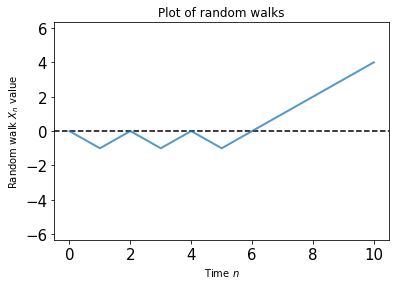

In [ ]:
random_key = jrandom.PRNGKey(int(time.time()))
plot_simple_random_walk(random_key,10,1)

Generating random walks....
Plotting random walks....


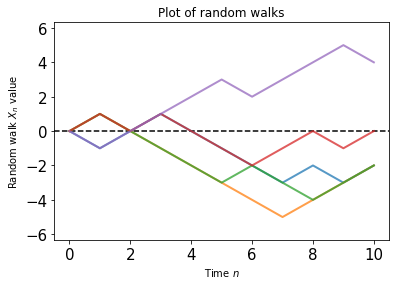

In [ ]:
random_key = jrandom.PRNGKey(int(time.time()))
plot_simple_random_walk(random_key,10,5)

Generating random walks....
Plotting random walks....


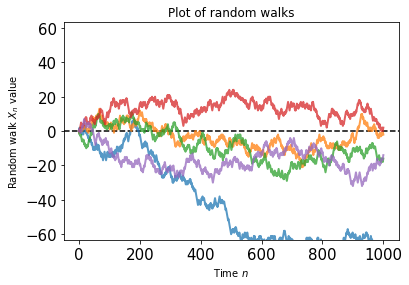

In [ ]:
random_key = jrandom.PRNGKey(int(time.time()))
plot_simple_random_walk(random_key,10**3,5)

Generating random walks....
Plotting random walks....


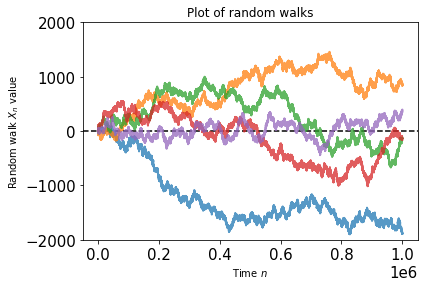

In [ ]:
random_key = jrandom.PRNGKey(int(time.time()))
plot_simple_random_walk(random_key,10**6,5)

# Rainy-Sunny simulator (Example 4.1 in Ross)

Computes and plots the probabilities of being rainy or sunny. Here is the problem description:

Suppose that the chance of rain tomorrow depends on previous weather conditions only through whether or not it is raining today and not on past weather conditions. Suppose also that if it rains today, then it will rain tomorrow with probability $\alpha$; and if it does not rain today, then it will rain tomorrow with probability $\beta$

In [8]:
#Simulation of the weather model from Example 1 in Ross 

#Parameters that effect chances of rain/snow
alpha = 2/3
beta = 1/2

#The transition matrix 
P = jnp.array([[alpha, 1-alpha],[beta, 1-beta]])
print(P)
print(jnp.shape(P))

[[0.6666667  0.33333334]
 [0.5        0.5       ]]
(2, 2)


In [9]:
#An initial probability vector
v0 = jnp.array([1.,0.])
print(v0)
print(jnp.shape(v0))

[1. 0.]
(2,)


In [12]:
v1 = jnp.matmul(v0,P)
print(v1)

[0.6666667  0.33333334]


In [13]:
v2 = jnp.matmul(v1,P)
print(v2)

[0.61111116 0.3888889 ]


In [15]:
v7 = jnp.matmul(v0,jnp.linalg.matrix_power(P,7))
print(v7)

[0.6000016  0.39999866]


-------
Day: 0
Probabilities:  [0.5 0.5]
-------
Day: 1
Probabilities:  [0.5833334 0.4166667]
-------
Day: 2
Probabilities:  [0.59722227 0.4027778 ]
-------
Day: 3
Probabilities:  [0.59953713 0.40046299]
-------
Day: 4
Probabilities:  [0.5999229 0.4000772]
-------
Day: 5
Probabilities:  [0.5999872 0.4000129]
-------
Day: 6
Probabilities:  [0.599998   0.40000218]
-------
Day: 7
Probabilities:  [0.5999998  0.40000045]
----Plot-----


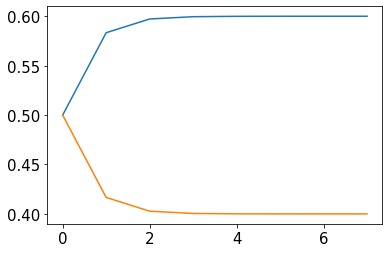

In [18]:


v0 = jnp.array([0.5,0.5])

#This list will store all the vectors in our simulation
v_list = []

N_days = 8 #Number of days to simulate
for n in range(N_days):
  print("-------")
  print("Day:", n)
  v = jnp.matmul(v0,jnp.linalg.matrix_power(P,n))
  print("Probabilities: ",v)
  v_list.append(v)

print("----Plot-----")  
v_array = jnp.stack(v_list)
plt.plot(v_array)